In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt
import random

In [2]:
df_tweets = pd.read_csv("data/tab2/preprocessed_tweets.csv")
df_tweets.dropna(inplace=True)
df_tweets

brand        date language_code  \
0           Airbnb  2019-07-31            en   
3           Airbnb  2019-07-31            en   
4           Airbnb  2019-07-31            en   
8           Airbnb  2019-07-31            en   
11          Airbnb  2019-07-31            en   
...            ...         ...           ...   
2733651  Starbucks  2020-10-01            en   
2733654  Starbucks  2020-10-01            en   
2733655  Starbucks  2020-10-01            en   
2733657  Starbucks  2020-10-01            en   
2733658  Starbucks  2020-10-01            en   

                                                   content  sentiment_neg  \
0        im going on early tonight im at an airbnb and ...          0.000   
3        Another day another airbnb cancellation with o...          0.059   
4         Get this amazing discount now from airbnb usi...          0.000   
8        Brother bought me a game of hookaduck for my b...          0.000   
11       3D VR Tours help AirBnB owners take their Mark...          0.000   
...                                                    ...            ...   
2733651  So good I had to share Check out all the items...          0.000   
2733654  Fall amp Pumpkin Spice Lattes arent basic anym...          0.000   
2733655        Starbucks hikes dividend by 98 percent SBUX          0.000   
2733657  Mobile Friendly amp Responsive Design mobilefr...          0.000   
2733658  can we all agree red cant be sus when he looks...          0.000   

         sentiment_neu  sentiment_pos language  
0                0.629          0.371  English  
3                0.838          0.103  English  
4                0.663          0.337  English  
8                0.900          0.100  English  
11               0.828          0.172  English  
...                ...            ...      ...  
2733651          0.715          0.285  English  
2733654          1.000          0.000  English  
2733655          1.000          0.000  English  
2733657          0.769          0.231  English  
2733658          0.691          0.309  English  

[1812629 rows x 8 columns]

In [3]:
# Define Stopwords
stopwords_base = set(STOPWORDS)
stopwords_file = open("data/tab2/stopwords_plus.txt", "r")
try:
    content = stopwords_file.read()
    stopwords_plus = content.split(",")
finally:
    stopwords_file.close()
stopwords_combined = set(stopwords_base).union(set(stopwords_plus))
stopwords_combined.update(["dont", "amp","link"])

In [5]:
# Drop Airbnb from brand column
df_tweets = df_tweets[df_tweets.brand != "Airbnb"]

In [ ]:
# Make all words lowercase
df_tweets['content'] = df_tweets['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [20]:
# remove stopwords and lemmatize
def remove_stopwords_lemmatize(text): 
    words = [w for w in word_tokenize(text) if not w in stopwords_combined]
    words = [WordNetLemmatizer().lemmatize(w) for w in words]
    return (" ").join(words)

In [22]:
df_tweets['content'] = df_tweets['content'].apply(lambda x: remove_stopwords_lemmatize(x))

C:\Users\Toni\AppData\Local\Temp\ipykernel_19988\1683807803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['content'] = df_tweets['content'].apply(lambda x: remove_stopwords_lemmatize(x))


In [23]:
df_tweets.drop(columns=["language_code","language"], inplace=True)

C:\Users\Toni\AppData\Local\Temp\ipykernel_19988\965047083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets.drop(columns=["language_code","language"], inplace=True)


In [43]:
df_tweets.to_csv("data/tab2/wordcloud_tweets.csv", index=False)

In [47]:
# # Lematize words in tweets
# def lemmatize_words(text):
#     lemmatizer = WordNetLemmatizer()
#     words = [lemmatizer.lemmatize(w) for w in word_tokenize(text)]
#     return (" ").join(words)
# df_tweets['content'] = df_tweets['content'].apply(lambda x: lemmatize_words(x))

In [25]:
df_tweets.to_csv("data/tab2/wordcloud_tweets_lemma.csv", index=False)

In [2]:
df_tweets = pd.read_csv("data/tab2/wordcloud_tweets_lemma.csv")

In [3]:
extra_stopwords = set(["check","poshmark","shopmycloset","enter","week","day","free","year","time","today","item"])
extra_stopwords

{'check',
 'day',
 'enter',
 'free',
 'item',
 'poshmark',
 'shopmycloset',
 'time',
 'today',
 'week',
 'year'}

In [6]:
brands_dict = {}
# keys = ["airbnb_stopwords","apple_stopwords","coca_cola_stopwords","nike_stopwords","starbucks_stopwords","hm_stopwords"]
# new_keys = ["Airbnb","Apple","Coca-Cola","Nike","Starbucks","HM"]
keys = ["apple_stopwords","coca_cola_stopwords","nike_stopwords","starbucks_stopwords","hm_stopwords"]
new_keys = ["Apple","Coca-Cola","Nike","Starbucks","HM"]
for key, new_key in zip(keys, new_keys):
    brands_dict[new_key] = globals()[key]

Size of element containing the wordcloud is 400x300

In [37]:
def color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    colors = "hsl(%d, 50%%, 50%%)" % random.randint(90, 220)
    return colors

def create_wordcloud(df,stopwords,max_words,brand,polarity,threshold):
    stopwords_updated = stopwords.copy()
    stopwords_updated.update(brands_dict[brand])
    
    wordcloud_string = pd.Series(df[(df["brand"] == brand) & (df["sentiment_neg" if polarity == "negative" else "sentiment_pos"] >= threshold)]["content"]).str.cat(sep=' ')
    wordcloud = WordCloud(width=900, stopwords=stopwords_updated,height=1200,max_font_size=125, min_font_size = 30, relative_scaling = 0,
                          max_words=max_words,collocations=False, background_color='White',prefer_horizontal = 1).generate(wordcloud_string)
    plt.figure(figsize=(25,30))

    plt.imshow(wordcloud.recolor(color_func=color_func),interpolation="bilinear")
    plt.axis("off")
    # save to image
    plt.savefig("data/tab2/wordclouds/{}_{}_wordcloud_square.png".format(brand,polarity,threshold), bbox_inches='tight')
    # plt.show()

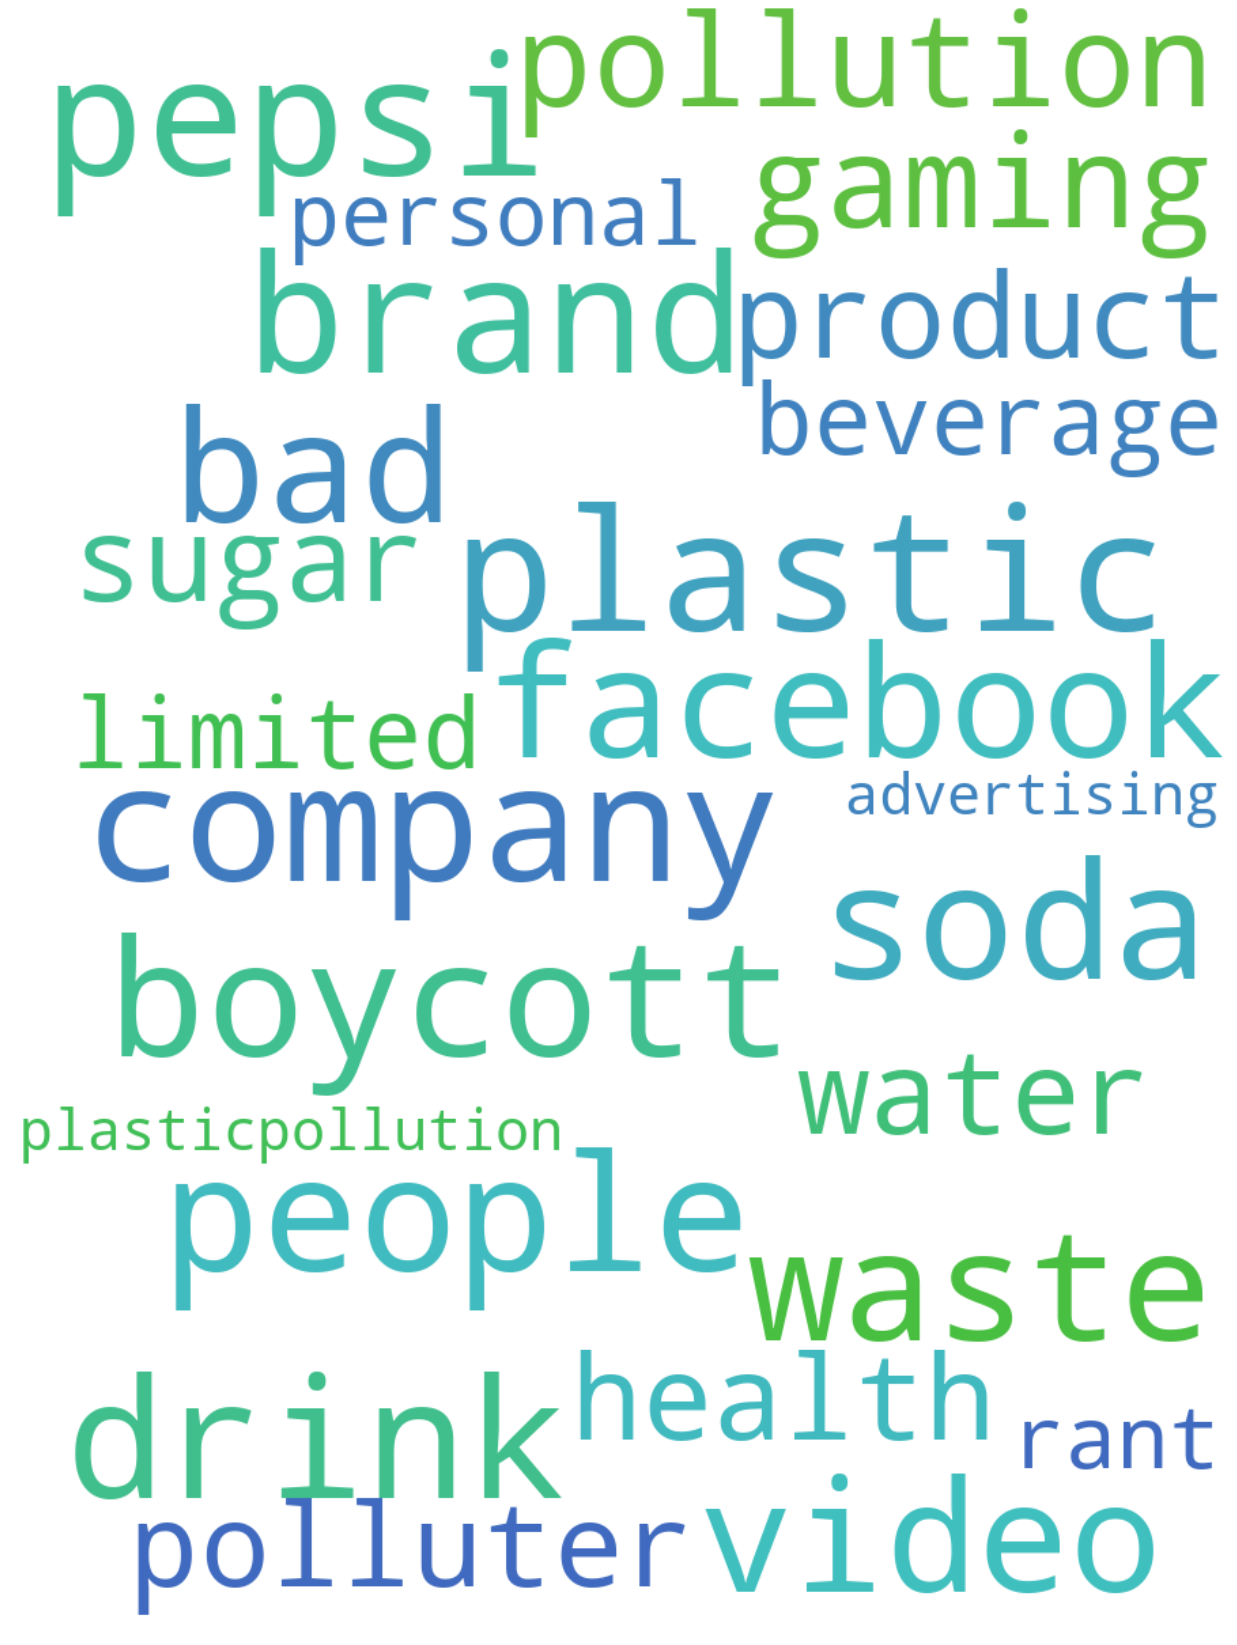

In [40]:
create_wordcloud(df_tweets,extra_stopwords,25,"Coca-Cola","negative",0.1)

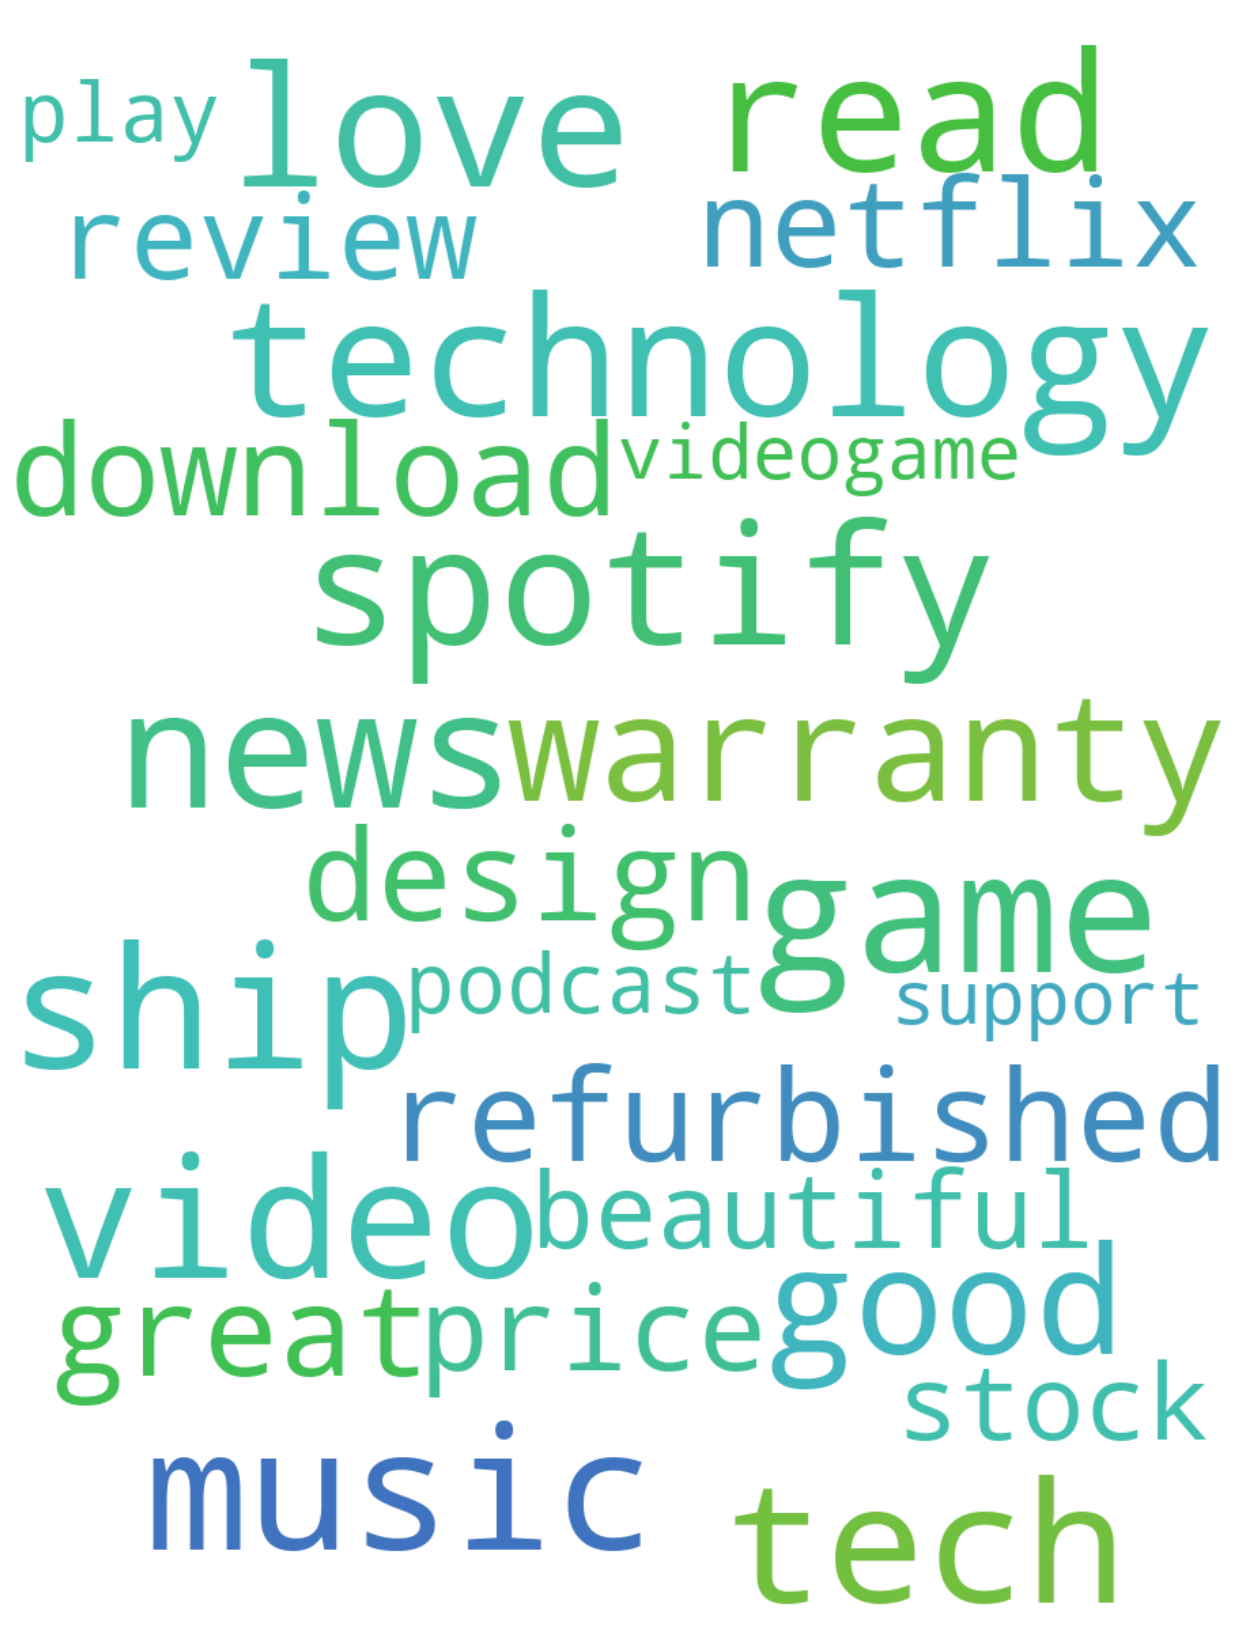

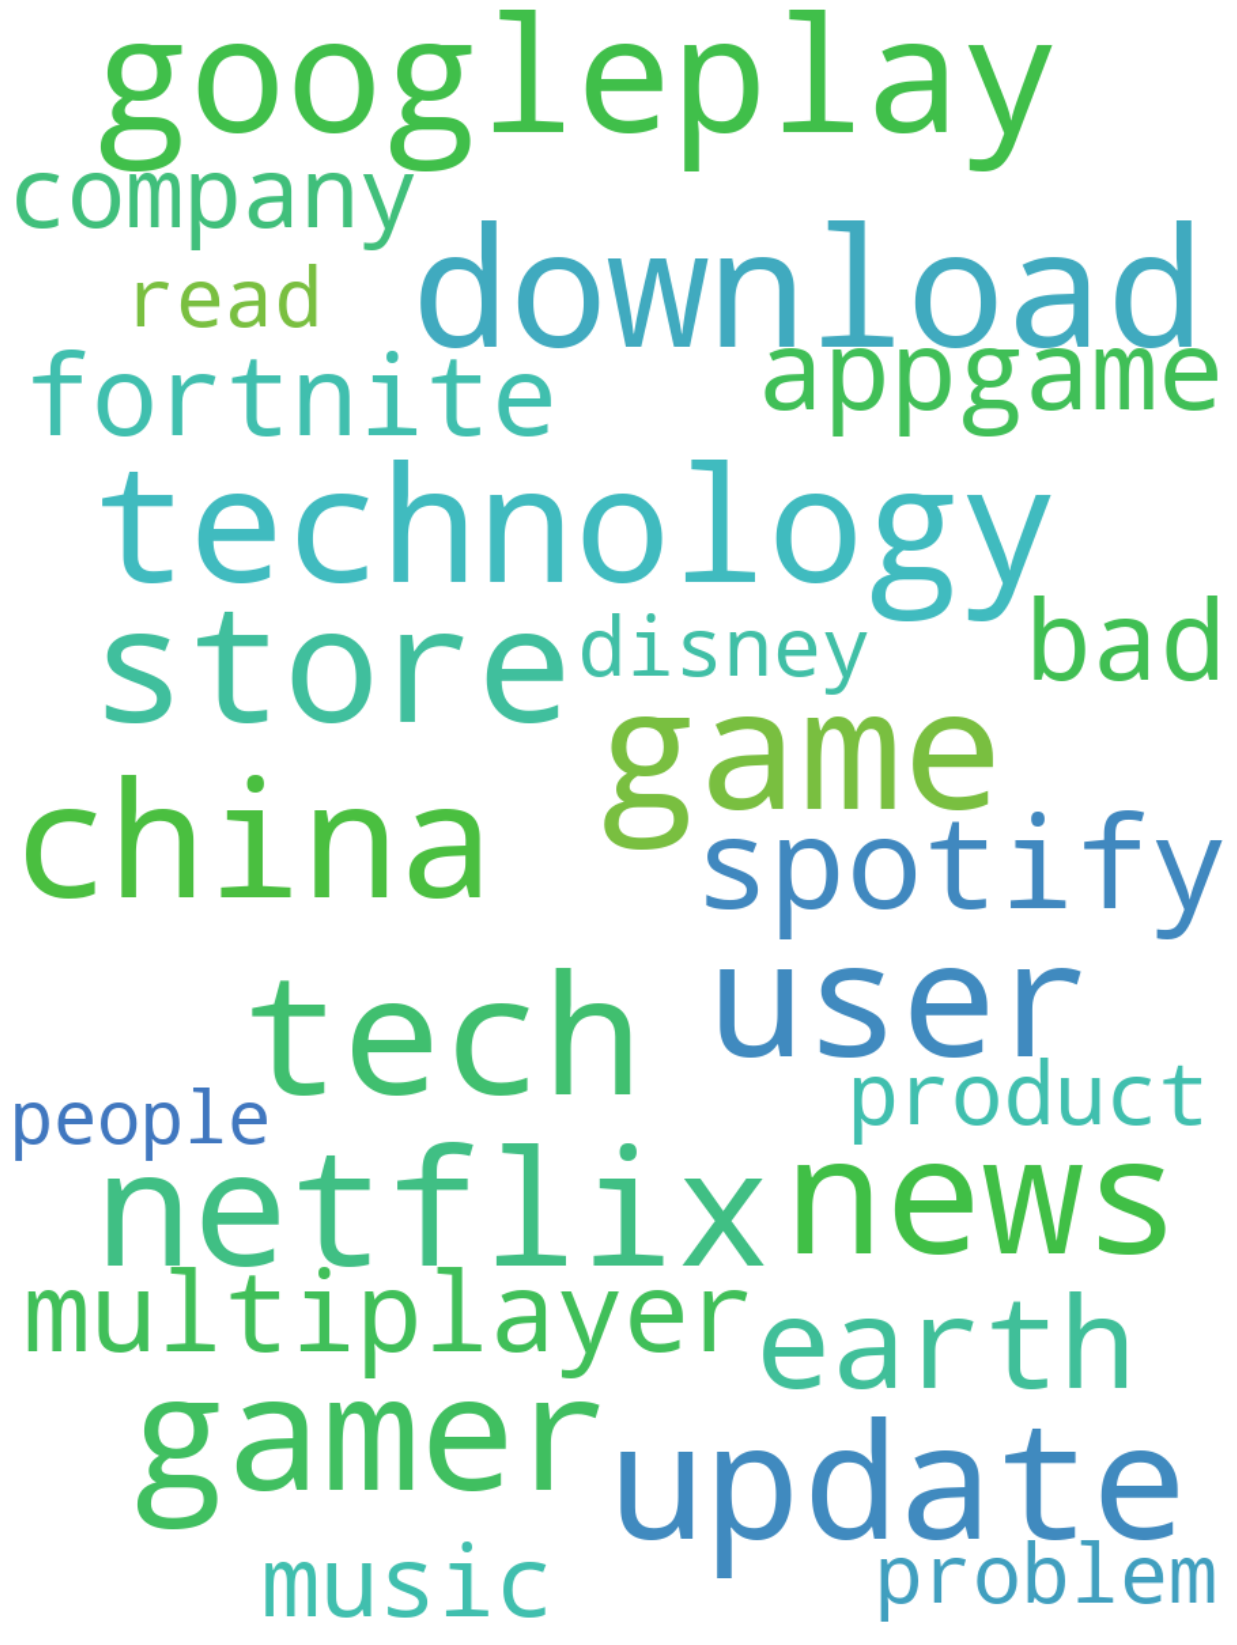

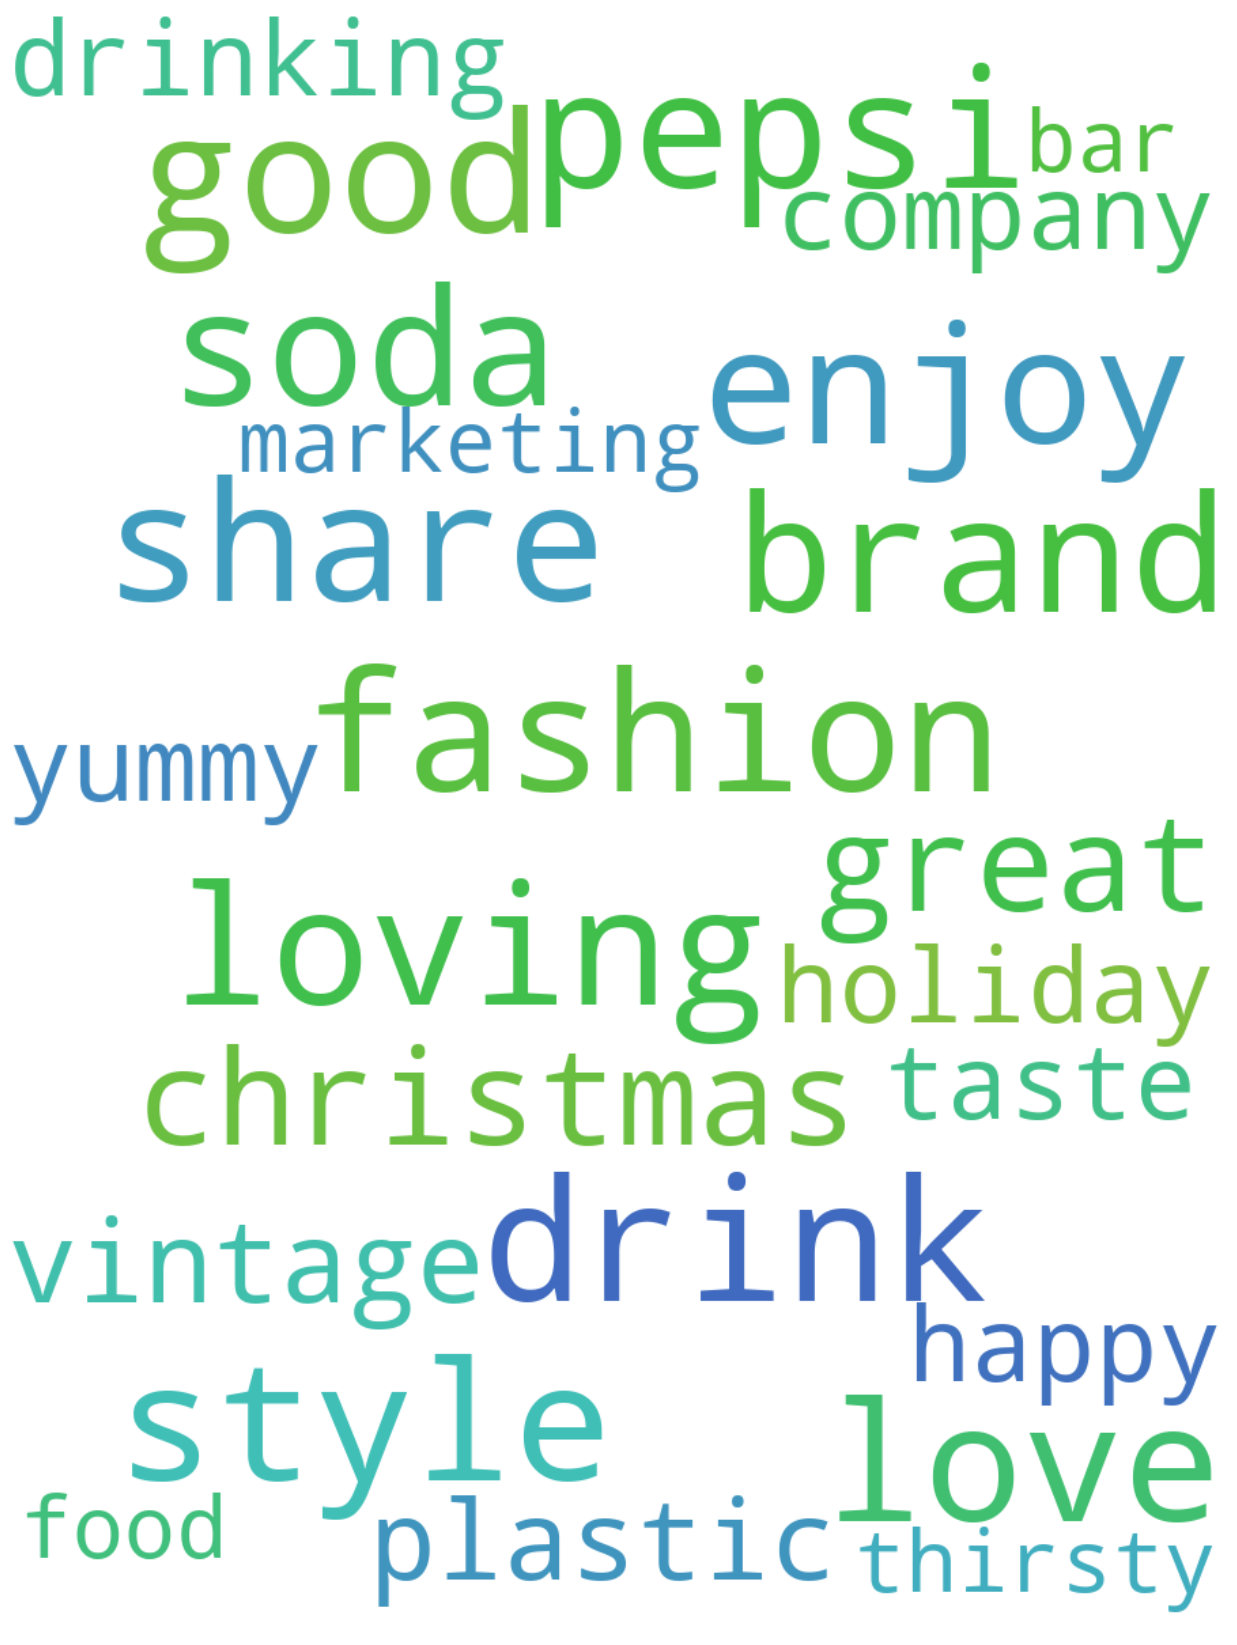

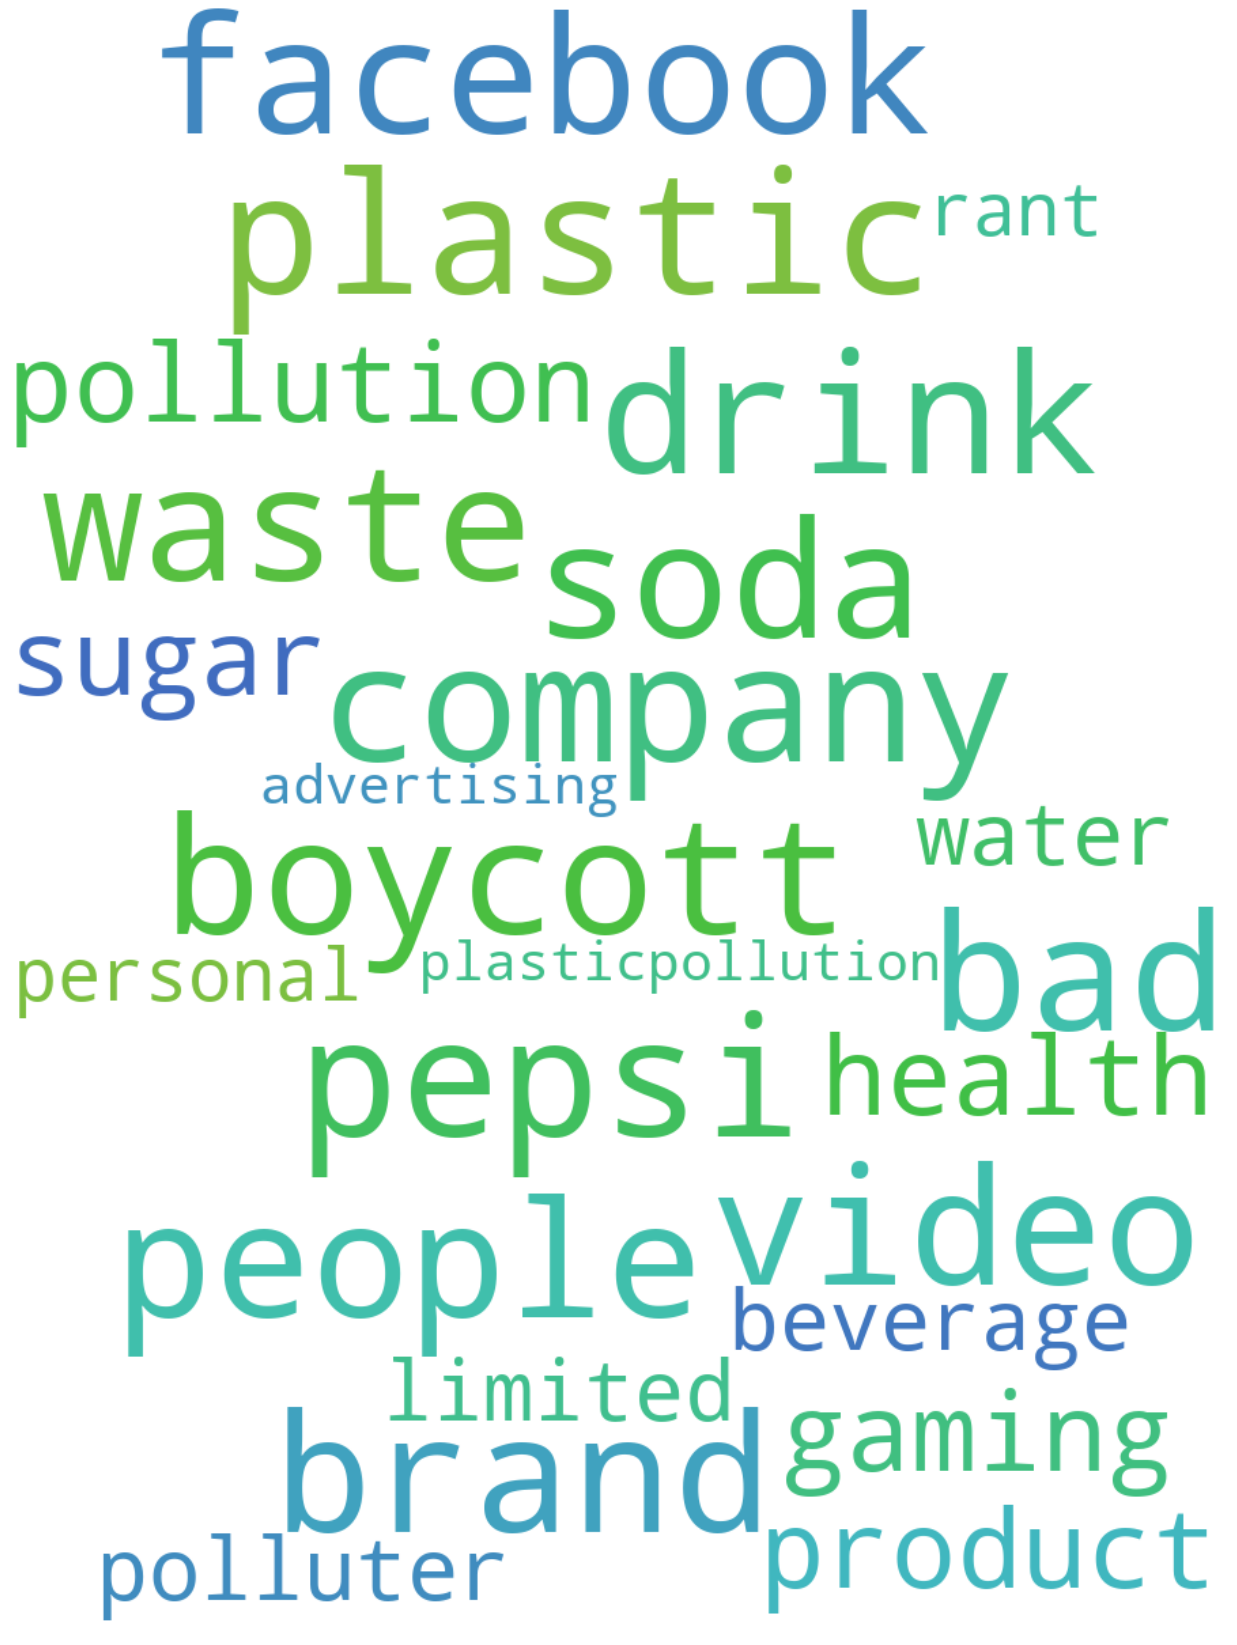

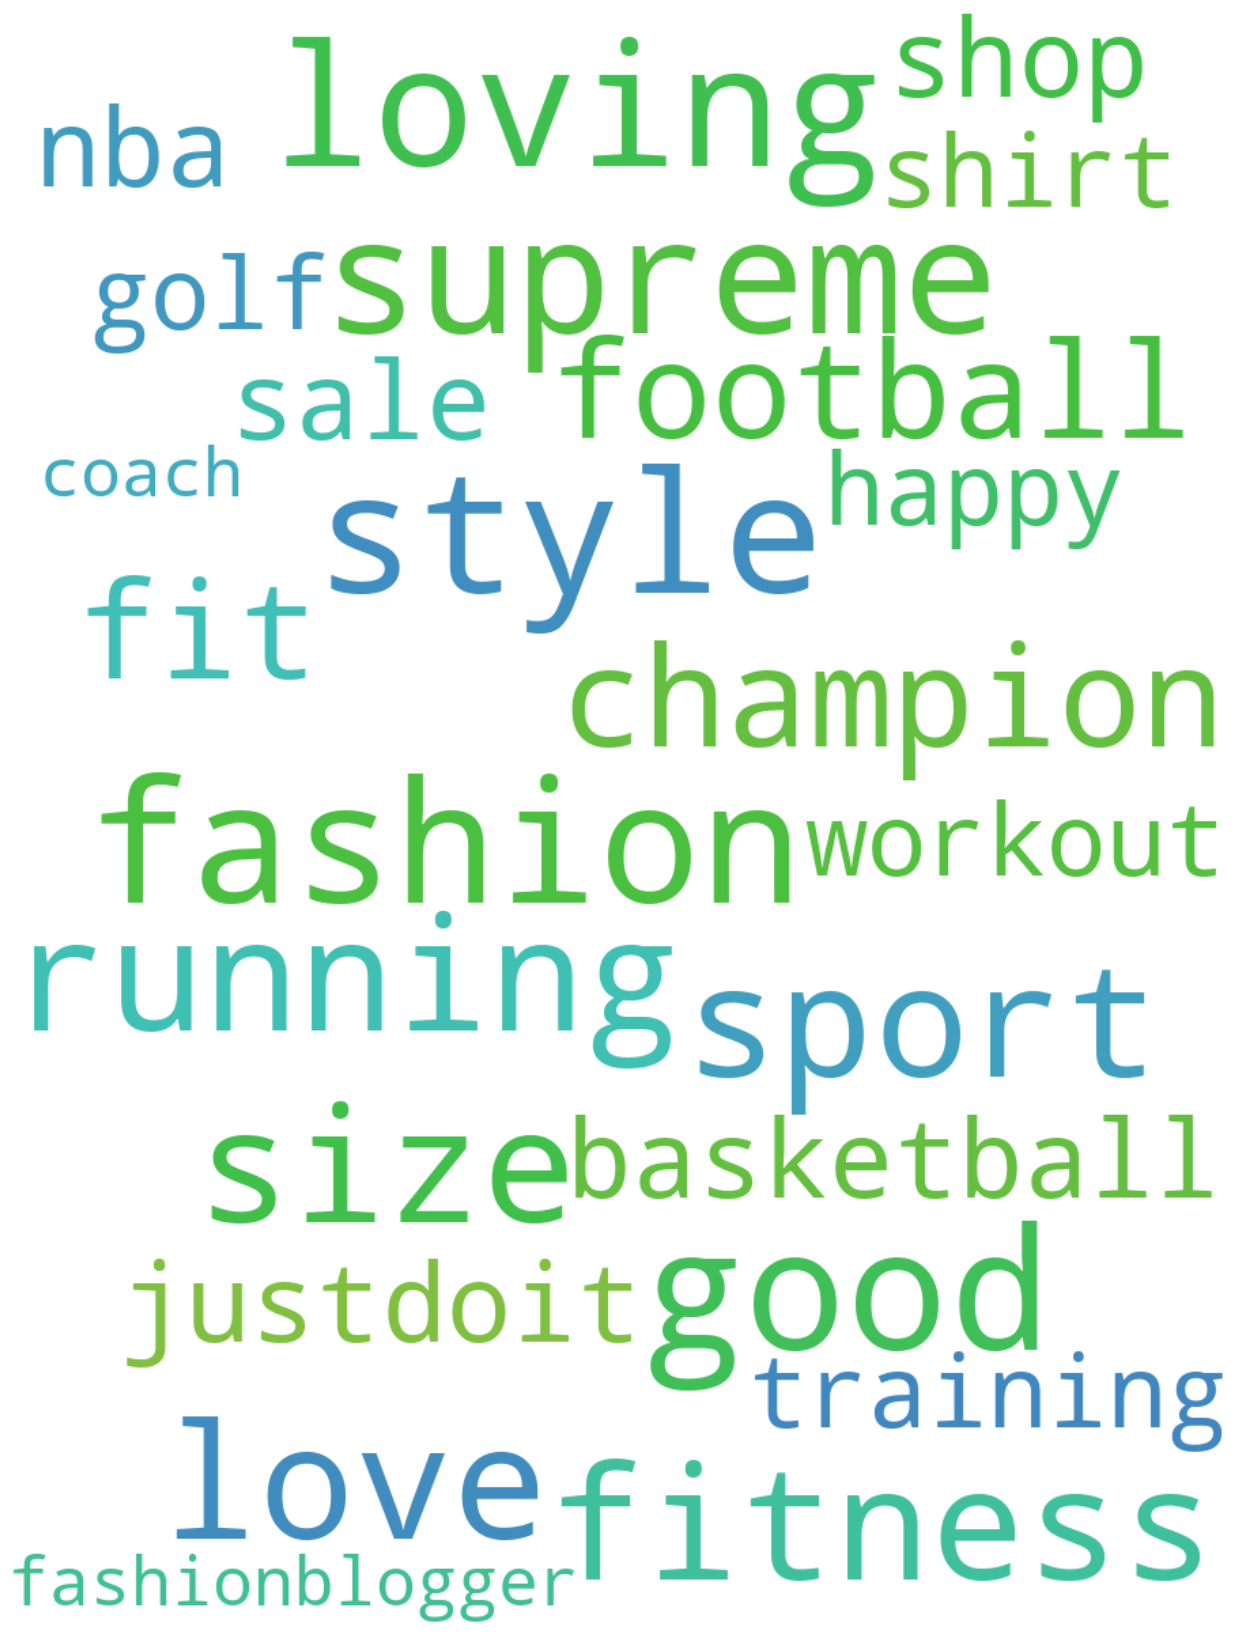

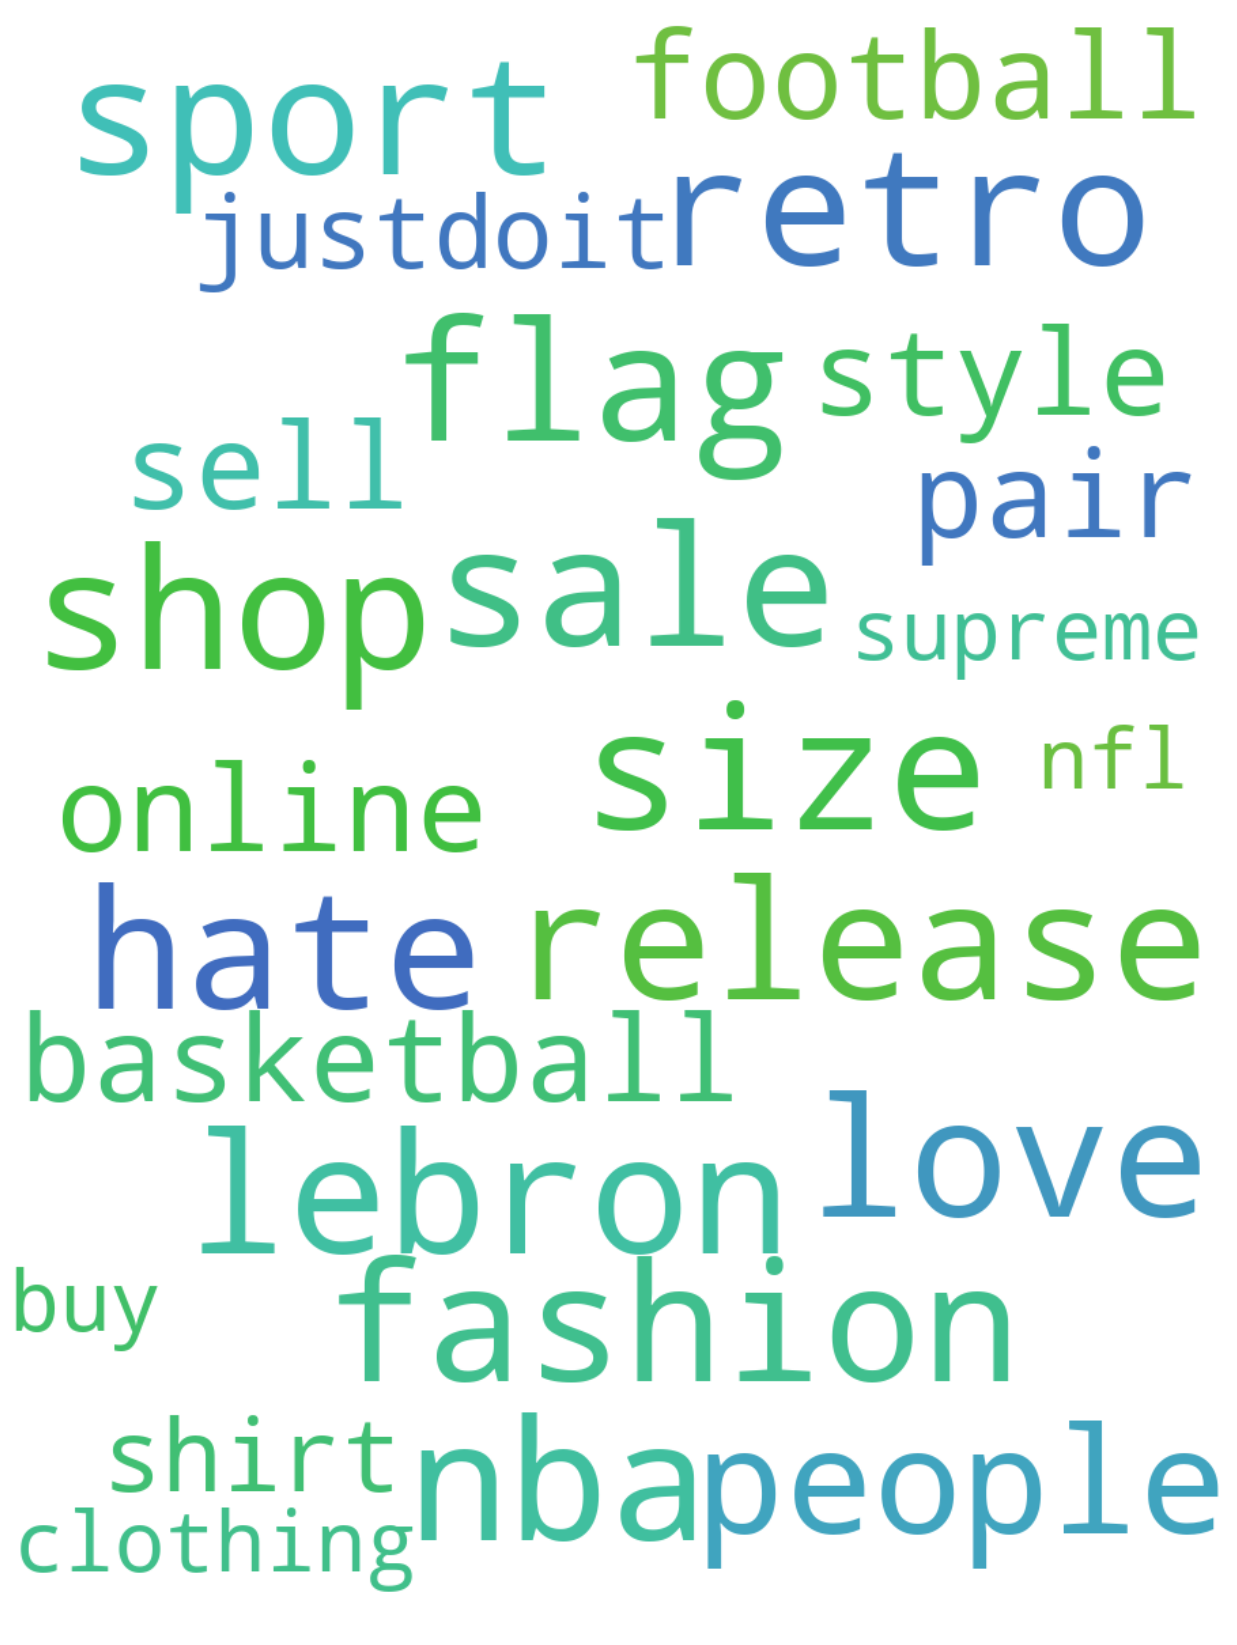

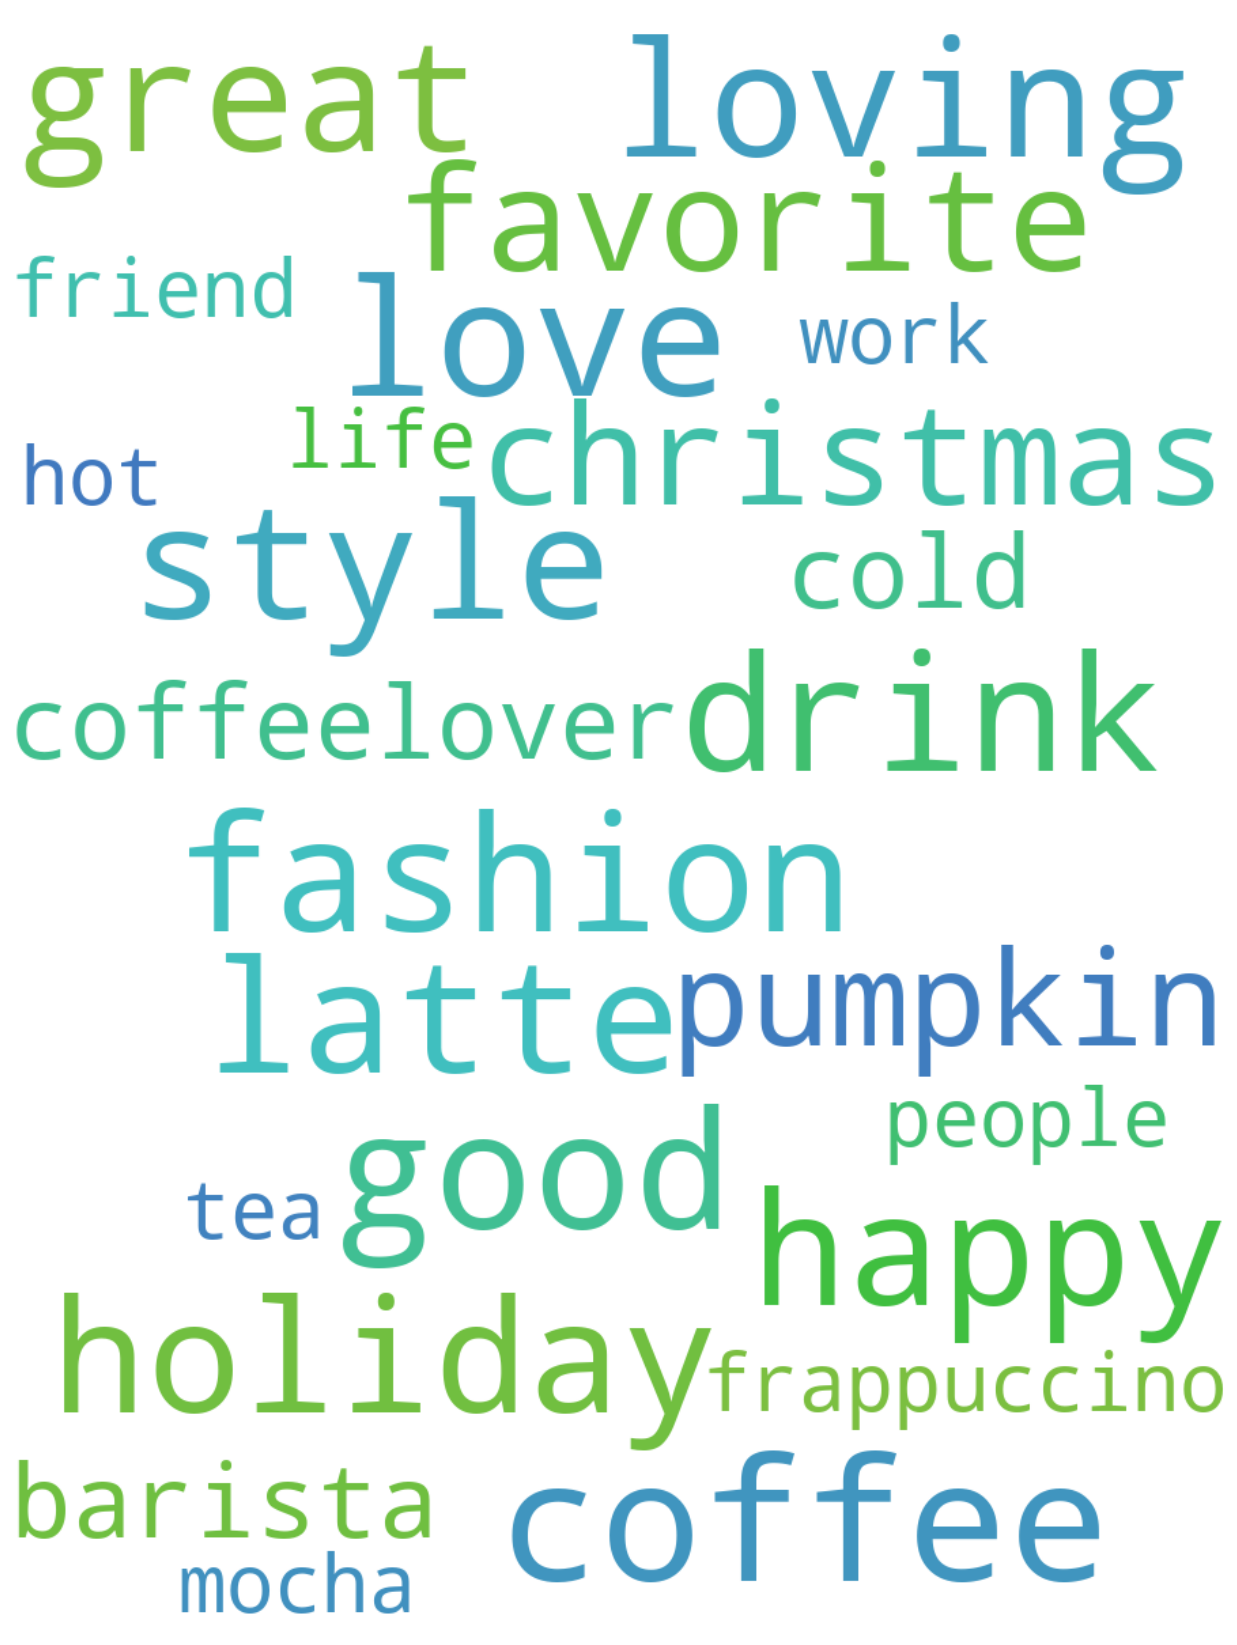

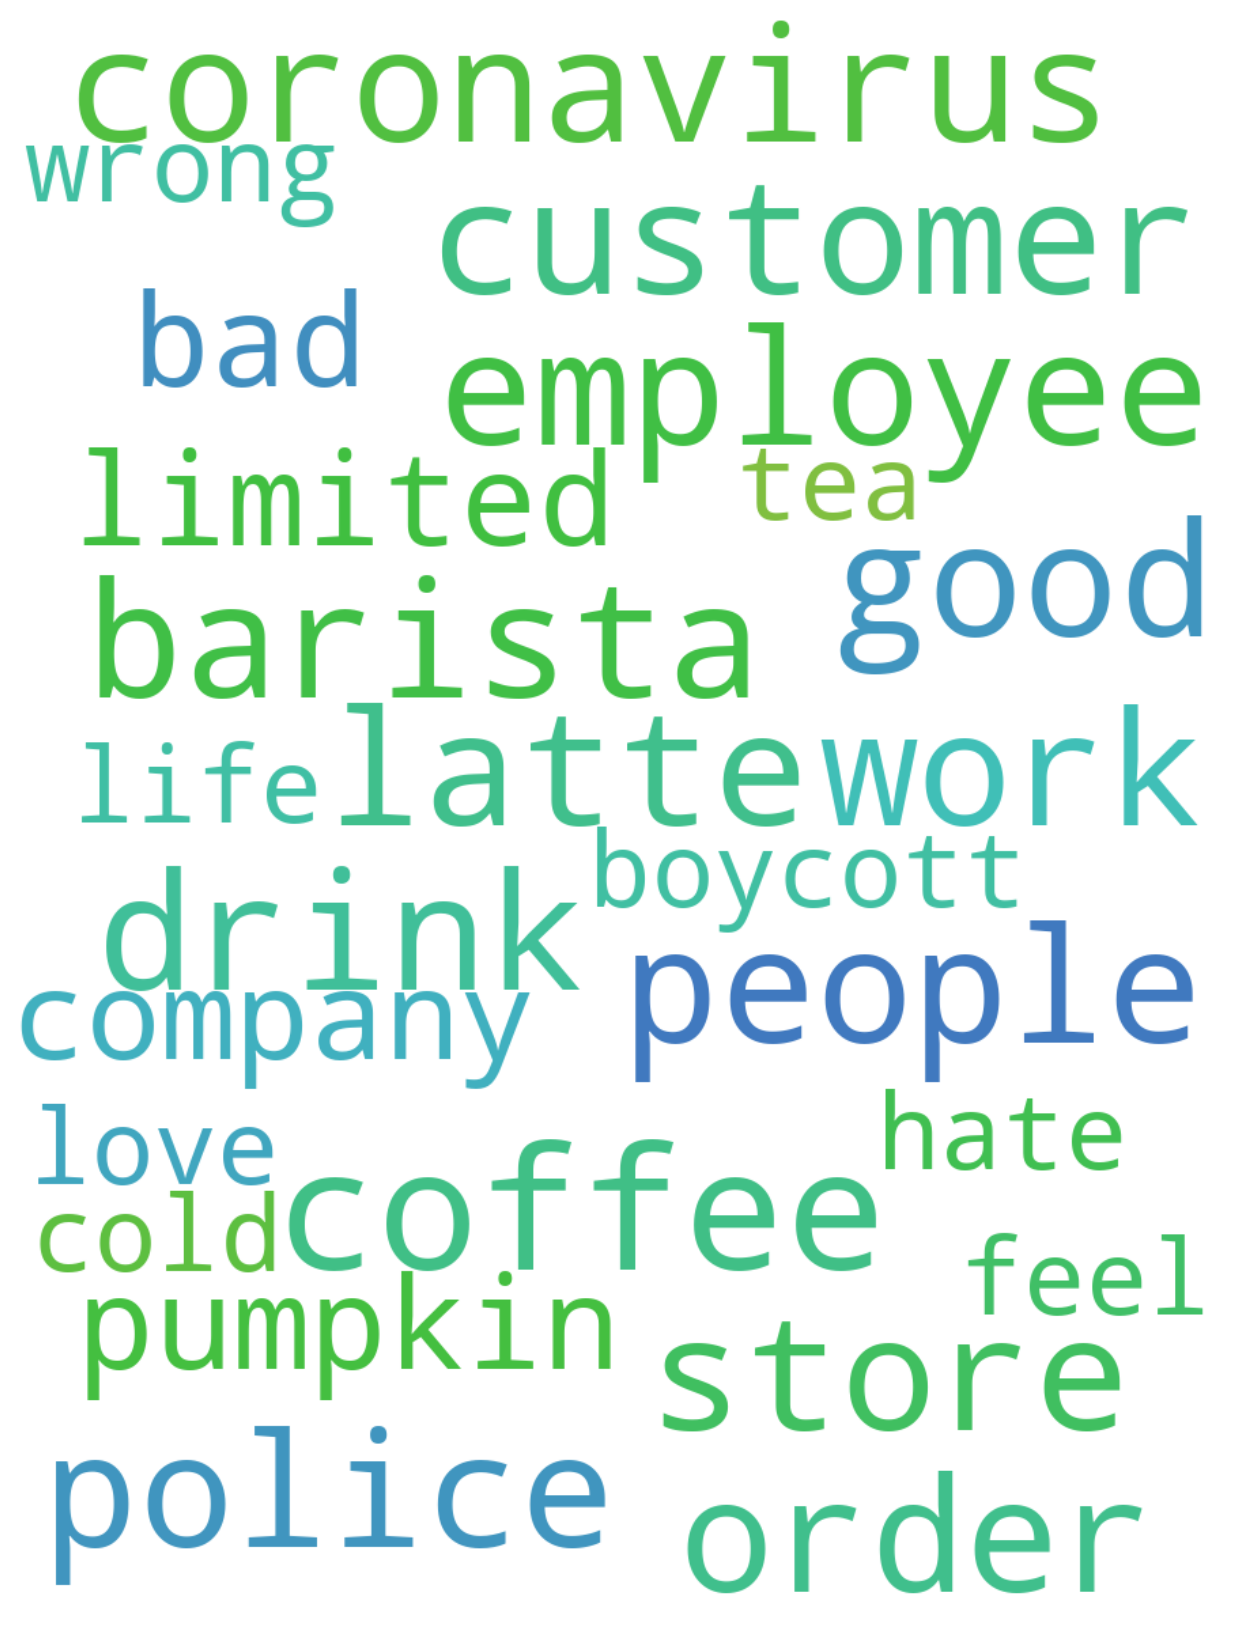

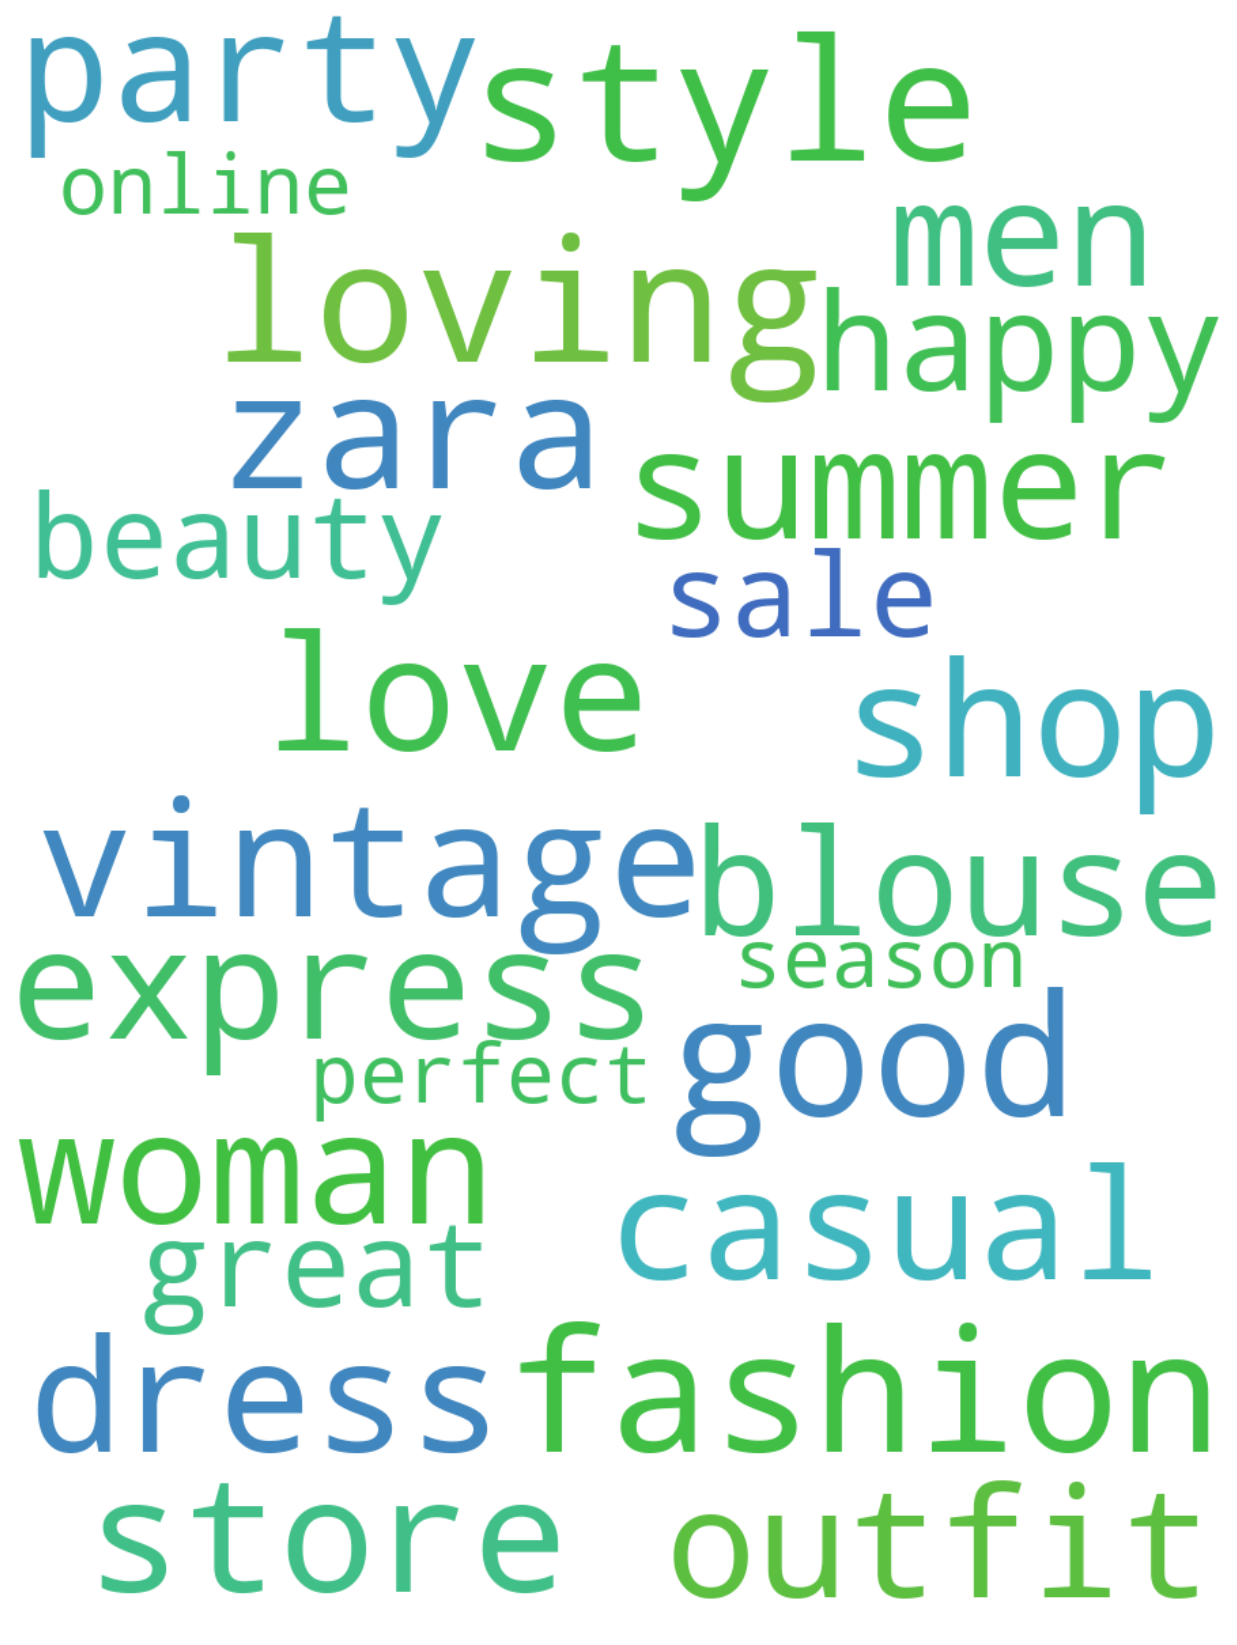

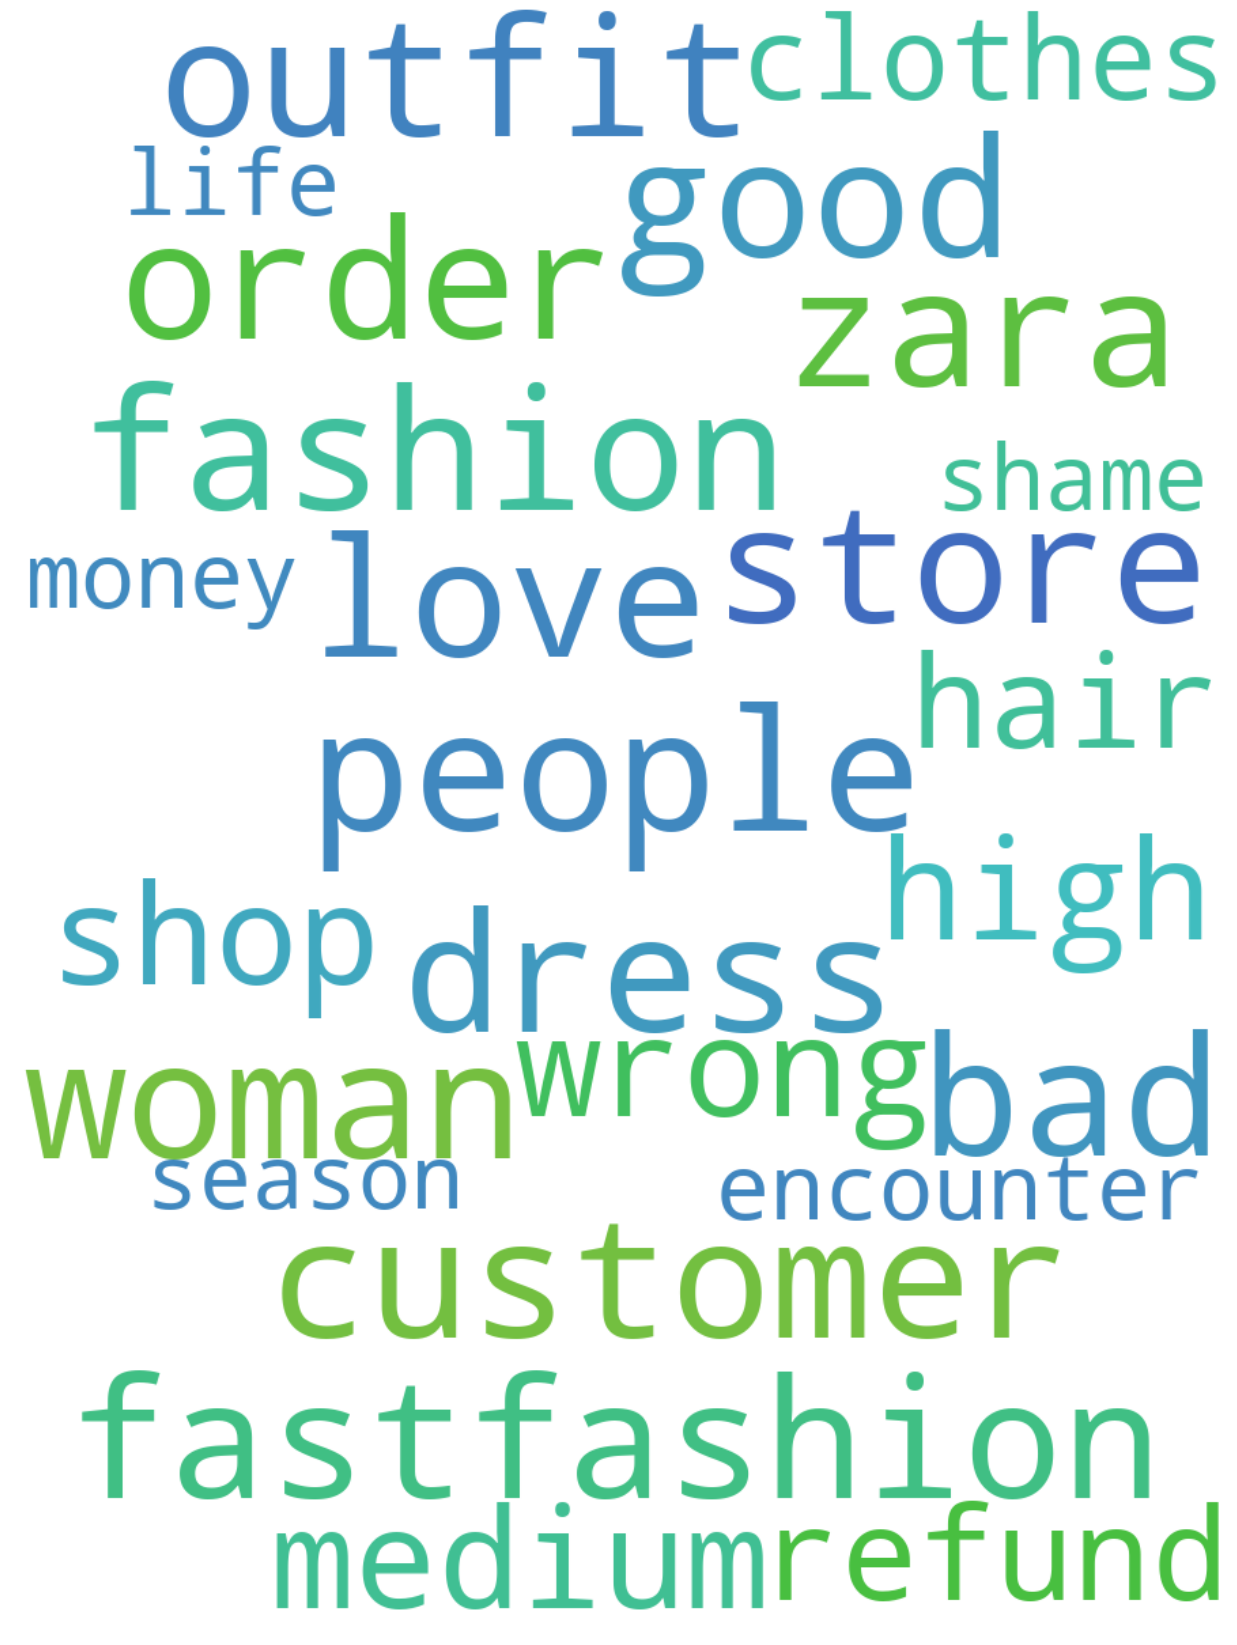

In [39]:
for brand in new_keys:
    for polarity in ["positive","negative"]:
        create_wordcloud(df_tweets,extra_stopwords,25,brand,polarity,0.1)

In [5]:
airbnb_stopwords = set(["airbnb","utah","utahvacation","vacationrental","airbnbs","men","woman","stayhere","state","time"])
apple_stopwords = set(["samsung","kobo","iphone","giveaway","ipad","applewatch","amazon","apple","io","win","indiegame","deal","macbook","google","airpod","android","pro","share","iphone12","mac","app",
                       "kindle","airpods","1yr","appleevent","phone","smartphone","roku","gamedev","author","iphone11","ibook","ian1","asmsg","apps","spub","itune","mobile",
                       "maco","itunes","macos","facebook","iartg","chapter","indiedev","pez","nyc","linkinbio","conquer","invasion","war","alien","screenshot","rpg","hero","watch","spwas"
                       ,"face"])
coca_cola_stopwords = set(["beer","cocacola","coca","coke","cola","bottle","glass","wine","yum","stream","vlog","war","atlanta","vlogs","unboxing","joshua","unboxings","tutorial",
                           "worldofcocacola2017","worldofcocacolaatlanta","storytimes","worldofcocacolaorlando"])
starbucks_stopwords = set(["share","starbuck","fall","amazon","card","win","morning","giveaway","starbucks","gift","alaskahappyhour","tumbler","black","disney","cup","thing"])
nike_stopwords = set(["nike","adida","adidas","yeezy","gucci","shoe","jordan","sneakerhead","air","share","black","kick","hypebeast","airjordan","max","airmax","offwhite","underarmour",
                      "white","sb","men","woman","nbaworkout","sneakernews","drop","dunk","low","force","red","snkr","snkrs","airforce1","sneaker","louisvuitton","balenciaga",
                      "dior","fendi","chanel","givenchy","prada","burberry","kaepernick"])
hm_stopwords = set(["hm","hampm","freepeople","share","katespade","americaneagleoutfitters","anthropologie","size","coach","lululemonathletica","police","india","country","kashmir","bjp",
                    "hmxme","delhi","terrorist","killed","black","govt","indian","terror","state","low","hiphop","militant","security","musiclife","loft","levi","michaelkors","oldnavy",
                    "jcrew","forever21","victoriassecret","nike","adidas","gap","bananarepublic","calvinklein","luckybrand","pinkvictoriassecret","disney","ootd","lularoe","meettheposher"])